**Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the,number of likes and Time Since posted. Dataset This is the Dataset You can use this dataset for this question.**

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from  matplotlib.figure import Figure
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import re 
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [31]:
df = pd.read_csv("instagram_reach.csv" )
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [33]:
def WordCloudPlotter(Column):
    colData = df[Column]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(Column))
    plt.tight_layout(pad = 0) 
  
    plt.show()

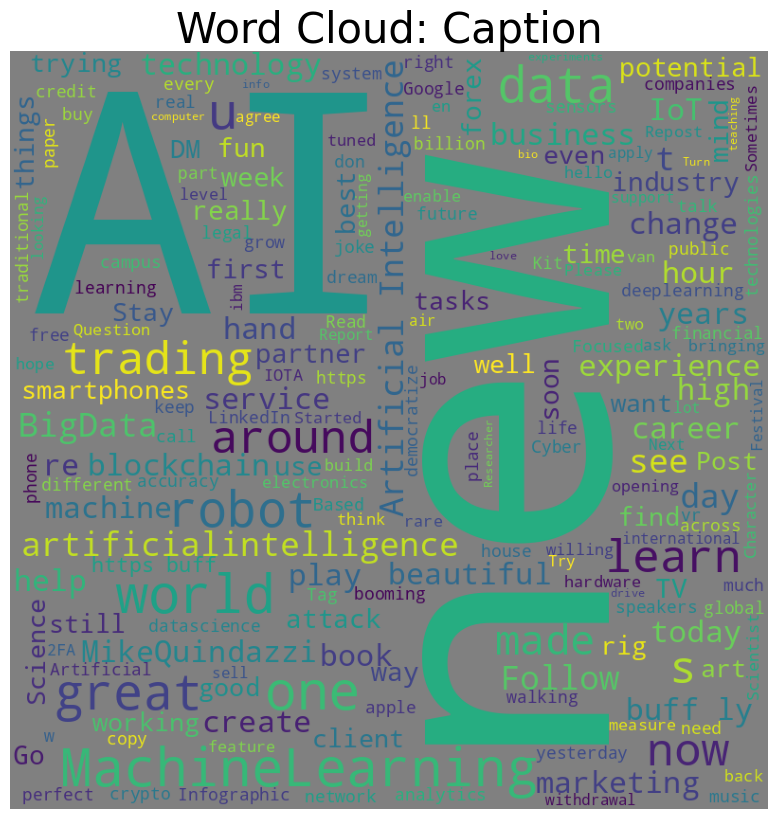

In [34]:
WordCloudPlotter('Caption')

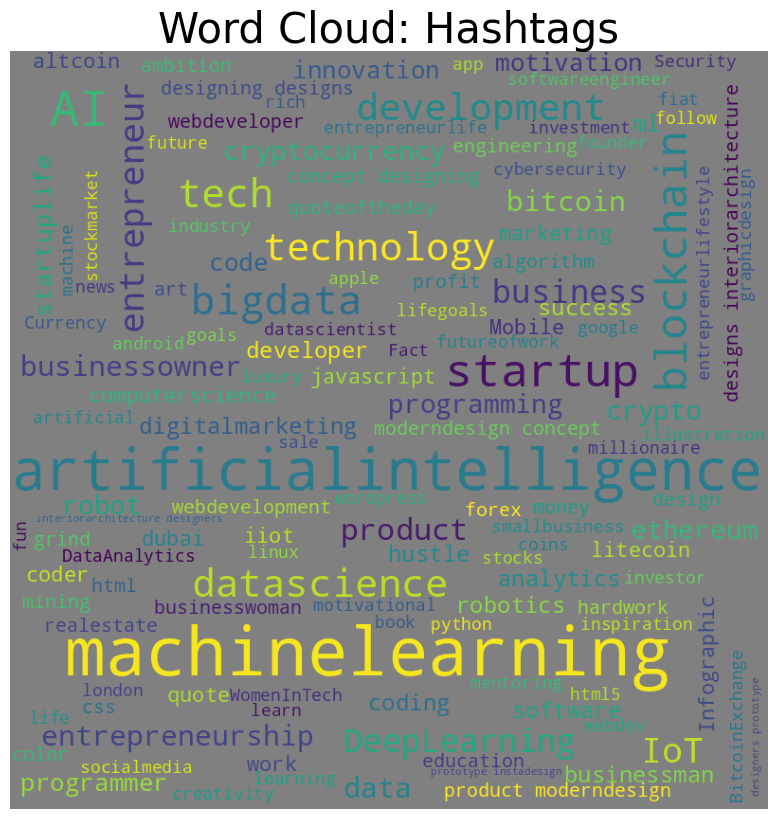

In [35]:
WordCloudPlotter('Hashtags')

In [38]:
df['Time since posted'].value_counts()

2 hours     57
3 hours     19
4 hours     13
7 hours      3
11 hours     2
8 hours      1
9 hours      1
5 hours      1
20 hours     1
14 hours     1
24 hours     1
Name: Time since posted, dtype: int64

In [39]:
df['Time since posted']= df['Time since posted'].str[:2]

In [40]:
df['Time since posted'].astype('int')

0     11
1      2
2      2
3      3
4      3
      ..
95     3
96     3
97     3
98     3
99     3
Name: Time since posted, Length: 100, dtype: int64

In [44]:
featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [45]:
# divide targets by max values
targets = targets/maxValLikes

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)


In [47]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

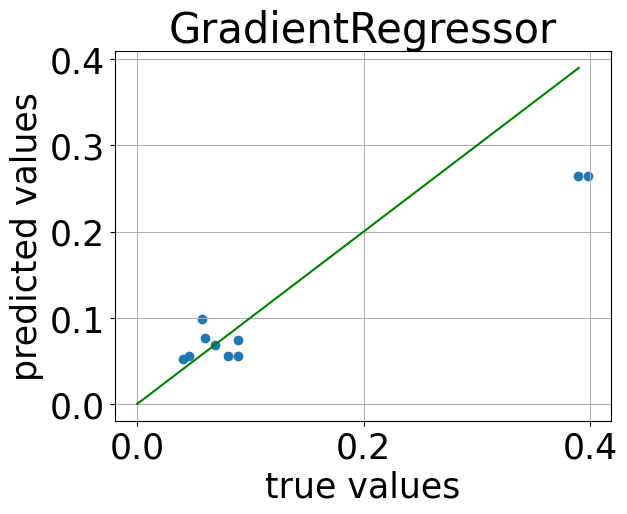

In [49]:
predictions = gbr.predict(x_test)
plt.scatter(y_test, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

**From Benchmarks this seems the model though not perfect is still workable. Lets do some Predictive modelling on the following cases:**

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(df[["Followers"]])
y = np.array(df["Likes"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [52]:
y.shape

(100,)

In [53]:
model = LinearRegression()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.16128913504989706

In [54]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

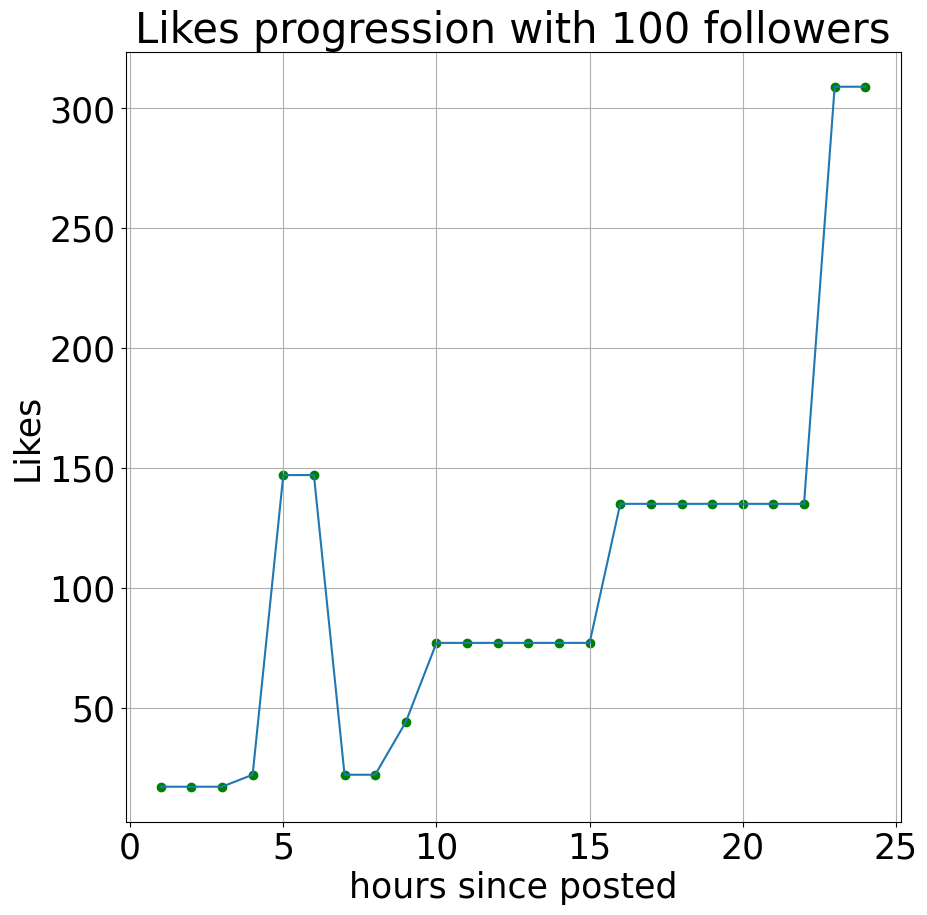

In [56]:
PredictionsWithConstantFollowers(gbr, 100, std, maxValLikes)


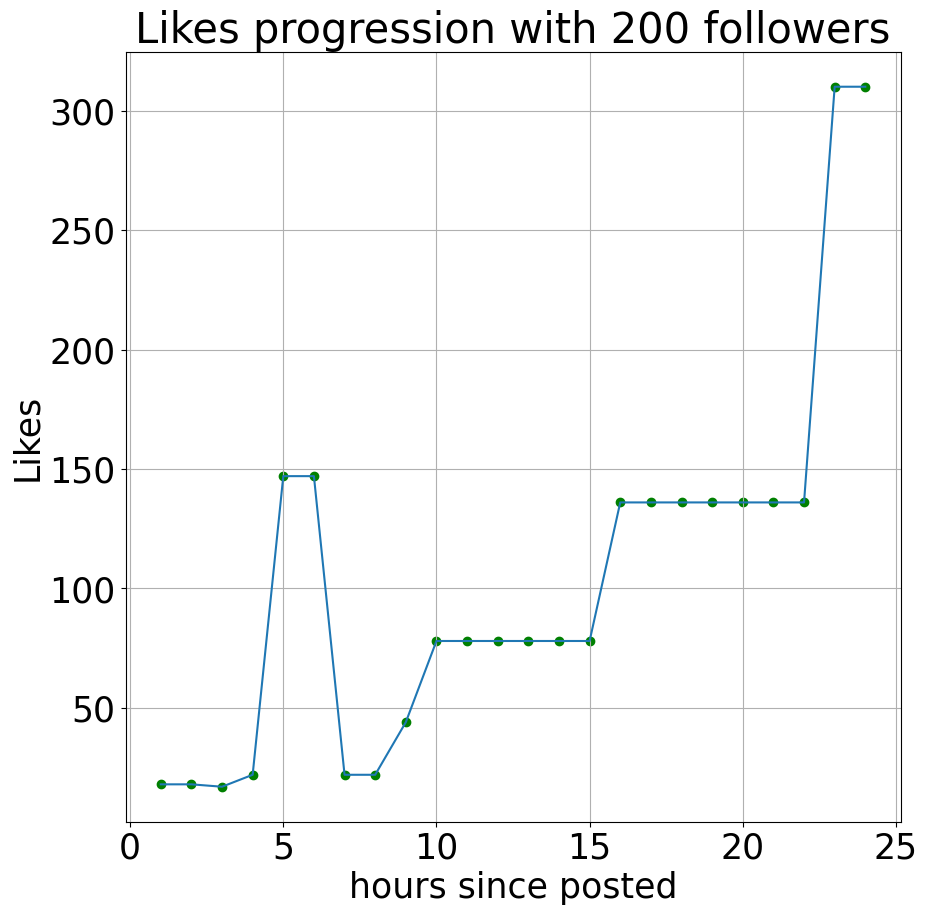

In [58]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, std, maxValLikes)


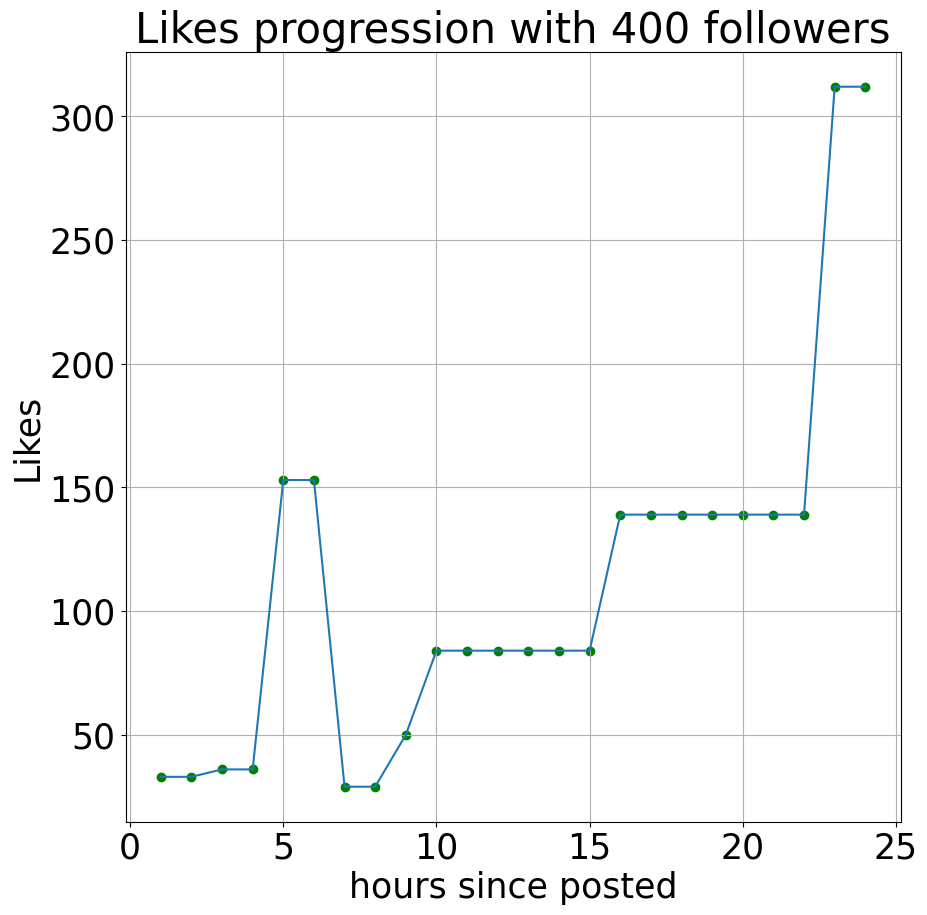

In [60]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, std, maxValLikes)


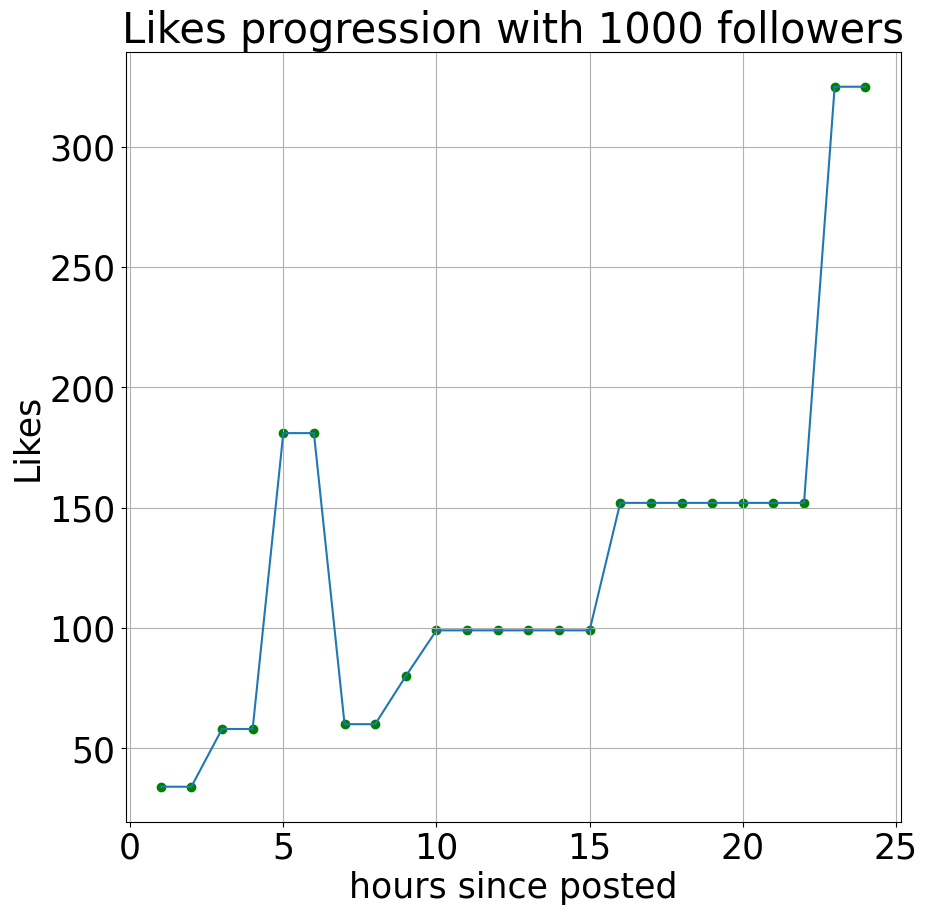

In [61]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, std, maxValLikes)


**According to this model we can infer one thing, that is, If you have higher number of followers your post will gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers yeild only about 20% increase in likes**

In [62]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

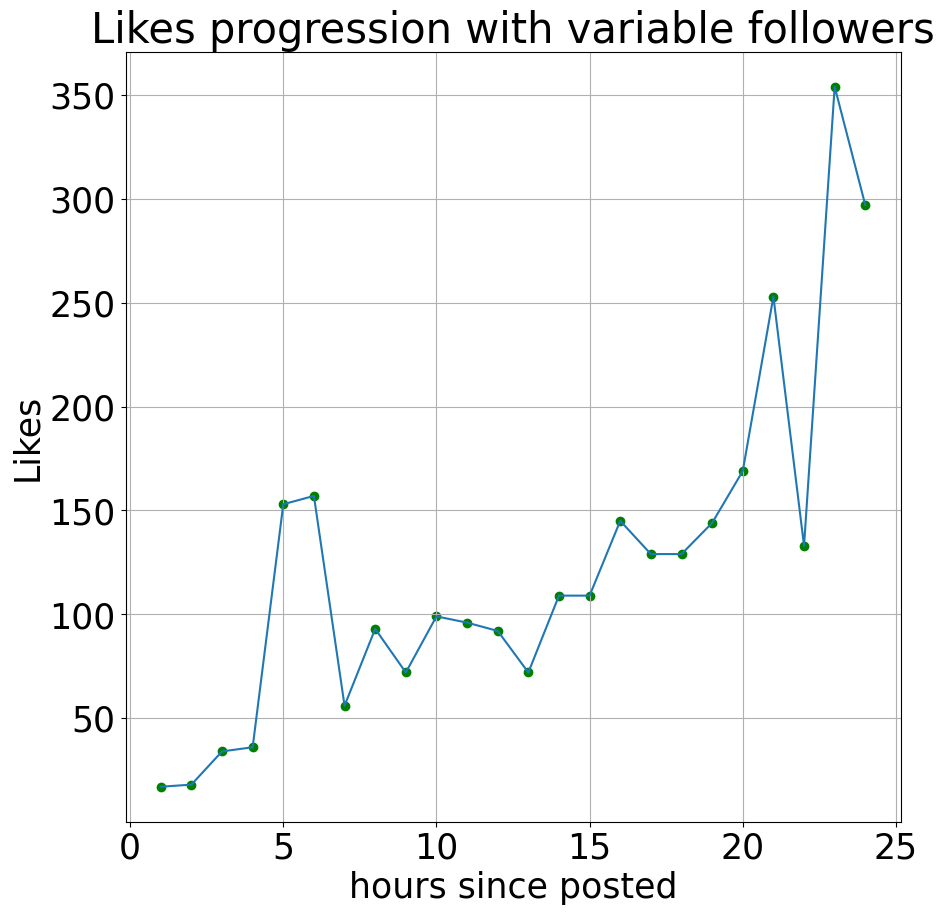

In [63]:
PredictionsWithVariableFollowers(gbr, 1000, std, maxValLikes)


**If our predictive model is right, and case 2 is true then around 15 hours posts like will grow exponentially !!**